In [48]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [43]:
# create a function that takes a directory as input and 
# spits out the mean firing rates and standard errors for each population

def getRatesAndErrs(filedir,duration,window):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
#     f = 1000/(window*numChr2) # factor to multiply spike counts by to get firing rates in Hz
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
    f = 1000/(window*len(chr_times)) # factor to multiply spike counts by to get firing rates in Hz
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2: # only want activity local to the center
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)       
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    
    means = [excMean, pvMean, somMean]
    SEMs = [excSEM, pvSEM, somSEM]
    return [means, SEMs]

In [44]:
def getRatesAndErrsControl(filedir,duration,window):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
    
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
            
    f = 1000/(window*len(control_times)) # factor to multiply spike counts by to get firing rates in Hz
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2: # only want activity local to the center
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)       
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    
    means = [excMean, pvMean, somMean]
    SEMs = [excSEM, pvSEM, somSEM]
    return [means, SEMs]

In [45]:
# create a function that takes a directory as input and 
# spits out the mean firing rates and standard errors for each population

def getDistCorner(pos_x, pos_y):
    if pos_x < 0.5 and pos_y < 0.5:
        return np.sqrt((0.0-pos_x)**2 + (0.0-pos_y)**2)
    elif pos_x < 0.5 and pos_y >= 0.5:
        return np.sqrt((0.0-pos_x)**2 + (1.0-pos_y)**2)
    elif pos_x >= 0.5 and pos_y < 0.5:
        return np.sqrt((1.0-pos_x)**2 + (0.0-pos_y)**2)
    elif pos_x >= 0.5 and pos_y >= 0.5:
        return np.sqrt((1.0-pos_x)**2 + (1.0-pos_y)**2)
    else:
        raise Exception()

def getRatesAndErrs_dist(filedir,duration,window,numChr2):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
    f = 1000/(window*numChr2) # factor to multiply spike counts by to get firing rates in Hz
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2: # only want activity local to the center
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)       
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    
    means = [excMean, pvMean, somMean]
    SEMs = [excSEM, pvSEM, somSEM]
    return [means, SEMs]

In [65]:
loc = ['distal'] # eventually append distal
#cont = ['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0'] # contrast, eventually append 0.1, 0.2, 0.3, 0.4
# cont = ['0.0','0.1','0.2','0.3','0.4']
cont = ['1.0', '2.0','3.0']
cont = [1.0, 1.5, 2.0,2.5] #, 2.0]
chr2tar = ['PV','SOM'] # chr2 target, eventually append SOM
# chr2str = ['0.015']
pfar = ['0.15']
#chr2str = ['0.0','0.1','0.2'] # only do these three
meanDict = {}
semDict = {}
j = 0
l = 'v4_distal'
p = 0.15

chrpvem = []
chrpvee = []
chrpvpm = []
chrpvpe = []
chrpvsm = []
chrpvse = []
chrsstem = []
chrsstee = []
chrsstpm = []
chrsstpe = []
chrsstsm = []
chrsstse = []
ctrlem = []
ctrlee = []
ctrlpm = []
ctrlpe = []
ctrlsm = []
ctrlse = []

t = 'PV'
s = 0.015
for c in cont:
    filedir = '%s_%s_%s_%s_%s'%(l,c,t,s,p)
    means, errs = getRatesAndErrs(filedir,10000,100)
    ctrlem.append(means[0])
    ctrlpm.append(means[1])
    ctrlsm.append(means[2])
    
    ctrlee.append(errs[0])
    ctrlpe.append(errs[1])
    ctrlse.append(errs[2])
    
t = 'PV'
s = 0.015
for c in cont:
    filedir = '%s_%s_%s_%s_%s'%(l,c,t,s,p)
    means, errs = getRatesAndErrsControl(filedir,10000,100)
    chrpvem.append(means[0])
    chrpvpm.append(means[1])
    chrpvsm.append(means[2])
    
    chrpvee.append(errs[0])
    chrpvpe.append(errs[1])
    chrpvse.append(errs[2])
    
    
t = 'SOM'
s = 0.012
for c in cont:
    filedir = '%s_%s_%s_%s_%s'%(l,c,t,s,p)
    means, errs = getRatesAndErrsControl(filedir,10000,100)
    chrsstem.append(means[0])
    chrsstpm.append(means[1])
    chrsstsm.append(means[2])
    
    chrsstee.append(errs[0])
    chrsstpe.append(errs[1])
    chrsstse.append(errs[2])
        

In [59]:
import matplotlib.pyplot as mpl
mpl.rcParams['font.size'] = 16

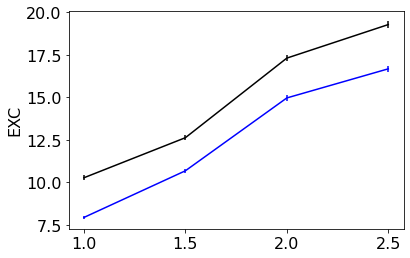

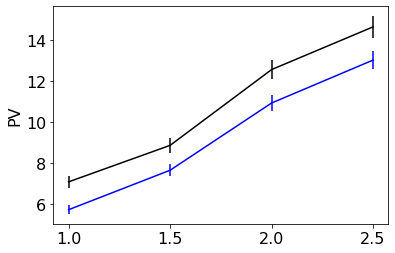

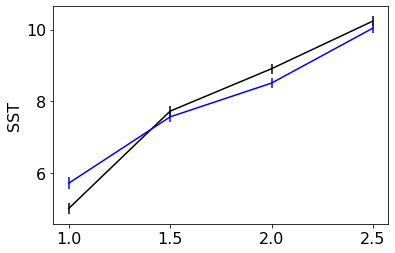

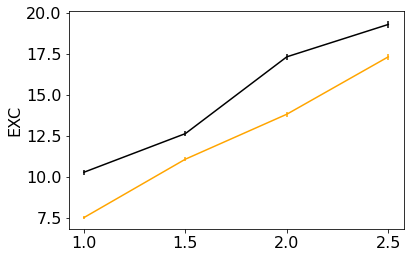

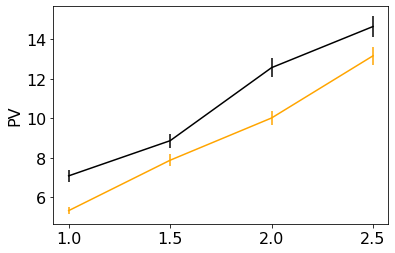

Text(0, 0.5, 'SST')

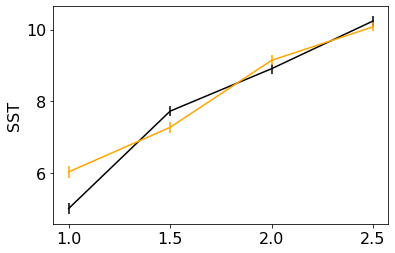

In [66]:
xx = cont
plt.errorbar(xx, ctrlem, yerr = ctrlee, c='black')
plt.errorbar(xx, chrpvem, yerr = chrpvee, c='blue')
plt.ylabel("EXC")
plt.show()

plt.errorbar(xx, ctrlpm, yerr = ctrlpe, c='black')
plt.errorbar(xx, chrpvpm, yerr = chrpvpe, c='blue')
plt.ylabel("PV")
plt.show()

plt.errorbar(xx, ctrlsm, yerr = ctrlse, c='black')
plt.errorbar(xx, chrpvsm, yerr = chrpvse, c='blue')
plt.ylabel("SST")
plt.show()

plt.errorbar(xx, ctrlem, yerr = ctrlee, c='black')
plt.errorbar(xx, chrsstem, yerr = chrsstee, c='orange')
plt.ylabel("EXC")
plt.show()

plt.errorbar(xx, ctrlpm, yerr = ctrlpe, c='black')
plt.errorbar(xx, chrsstpm, yerr = chrsstpe, c='orange')
plt.ylabel("PV")
plt.show()

plt.errorbar(xx, ctrlsm, yerr = ctrlse, c='black')
plt.errorbar(xx, chrsstsm, yerr = chrsstse, c='orange')
plt.ylabel("SST")

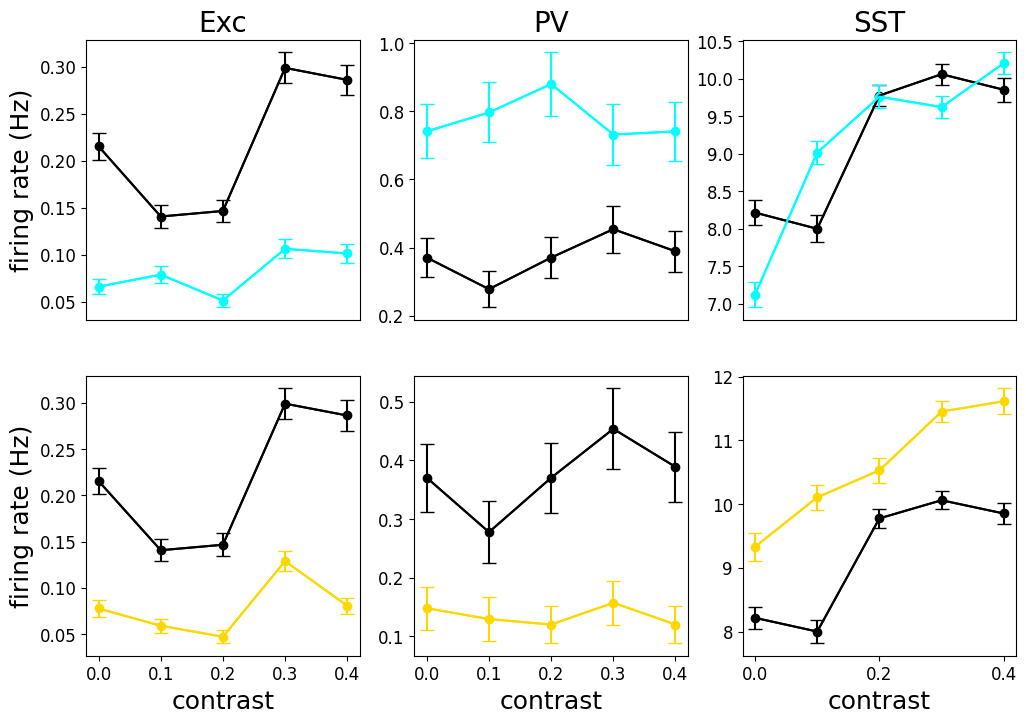

In [5]:
def contCurvesD(meanDict,semDict,savefig=True):
    #cont = ['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
    cont = ['0.0','0.1','0.2','0.3','0.4']
    # pre-processing
    ################ PV stim ################
    PVdata = {}
    for s in chr2str:
        lab = str(int(100*float(s)))
        #print(lab)
        PVdata['chr'+lab+'excMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_PV_%s'%s+'_0.15'
            PVdata['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            PVdata['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(100*float(s)))  
        PVdata['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_PV_%s'%s+'_0.15'
            PVdata['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            PVdata['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(100*float(s)))  
        PVdata['chr'+lab+'somMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_PV_%s'%s+'_0.15'
            PVdata['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            PVdata['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
    ################ SOM stim ################
    SOMdata = {}
    for s in chr2str:
        lab = str(int(100*float(s)))
        #print(lab)
        SOMdata['chr'+lab+'excMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_SOM_%s'%s+'_0.15'
            SOMdata['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            SOMdata['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(100*float(s)))  
        SOMdata['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_SOM_%s'%s+'_0.15'
            SOMdata['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            SOMdata['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(100*float(s)))  
        SOMdata['chr'+lab+'somMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_SOM_%s'%s+'_0.15'
            SOMdata['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            SOMdata['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
    
    cont = np.array(cont,dtype=float)
    
    # PLOTTING
    fig, axes = plt.subplots(2,3,figsize = (12,8),gridspec_kw = {'height_ratios':[1,1]})

    # Exc response to PV stim
    ax00 = axes[0][0] # left
    ax00.set_title('Exc',fontsize=20)
    ax00.errorbar(cont, PVdata['chr0excMeans'], yerr = PVdata['chr0excSEMs'], c='black', capsize=5)
    ax00.plot(cont,PVdata['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    #ax00.errorbar(cont, PVdata['chr5excMeans'], yerr = PVdata['chr5excSEMs'], c='blue', capsize=5)
    #ax00.plot(cont,PVdata['chr5excMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax00.errorbar(cont, PVdata['chr2excMeans'], yerr = PVdata['chr2excSEMs'], c='aqua', capsize=5)
    ax00.set_xticks([])
    ax00.tick_params(axis='y',labelsize=12)
    ax00.plot(cont,PVdata['chr2excMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')    
    ax00.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV response to PV stim
    ax01 = axes[0][1] # middle
    ax01.set_title('PV',fontsize=20)
    ax01.errorbar(cont, PVdata['chr0pvMeans'], yerr = PVdata['chr0pvSEMs'], c='black', capsize=5)
    ax01.plot(cont,PVdata['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    #ax01.errorbar(cont, PVdata['chr5pvMeans'], yerr = PVdata['chr5pvSEMs'], c='blue', capsize=5)
    #ax01.plot(cont,PVdata['chr5pvMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax01.errorbar(cont, PVdata['chr2pvMeans'], yerr = PVdata['chr2pvSEMs'], c='aqua', capsize=5)
    ax01.plot(cont,PVdata['chr2pvMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax01.set_xticks([])
    ax01.tick_params(axis='y',labelsize=12)

    # SOM response to PV stim
    ax02 = axes[0][2] # right
    ax02.set_title('SST',fontsize=20)
    ax02.errorbar(cont, PVdata['chr0somMeans'], yerr = PVdata['chr0somSEMs'], c='black', capsize=5)
    ax02.plot(cont,PVdata['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    #ax02.errorbar(cont, PVdata['chr5somMeans'], yerr = PVdata['chr5somSEMs'], c='blue', capsize=5)
    #ax02.plot(cont,PVdata['chr5somMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax02.errorbar(cont, PVdata['chr2somMeans'], yerr = PVdata['chr2somSEMs'], c='aqua', capsize=5)
    ax02.plot(cont,PVdata['chr2somMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax02.set_xticks([])
    ax02.tick_params(axis='y',labelsize=12)

    # Exc response to SOM stim
    ax10 = axes[1][0] # bottom left
    ax10.errorbar(cont, SOMdata['chr0excMeans'], yerr = SOMdata['chr0excSEMs'], c='black', capsize=5)
    ax10.plot(cont,SOMdata['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    #ax10.errorbar(cont, SOMdata['chr5excMeans'], yerr = SOMdata['chr5excSEMs'], c='darkorange', capsize=5)
    #ax10.plot(cont,SOMdata['chr5excMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
    ax10.errorbar(cont, SOMdata['chr2excMeans'], yerr = SOMdata['chr2excSEMs'], c='gold', capsize=5)
    ax10.plot(cont,SOMdata['chr2excMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')
    ax10.tick_params(axis='y',labelsize=12)
    ax10.tick_params(axis='x',labelsize=12)
    #ax10.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
    ax10.set_xlabel('contrast',fontsize=18)
    ax10.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV response to SOM stim
    ax11 = axes[1][1] # bottom middle
    ax11.tick_params(axis='y',labelsize=12)
    ax11.tick_params(axis='x',labelsize=12)
    #ax11.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
    ax11.set_xlabel('contrast',fontsize=18)
    ax11.errorbar(cont, SOMdata['chr0pvMeans'], yerr = SOMdata['chr0pvSEMs'], c='black', capsize=5)
    ax11.plot(cont,SOMdata['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    #ax11.errorbar(cont, SOMdata['chr5pvMeans'], yerr = SOMdata['chr5pvSEMs'], c='darkorange', capsize=5)
    #ax11.plot(cont,SOMdata['chr5pvMeans'],linestyle='-',marker='o',color='orange',label='low ChR2')
    ax11.errorbar(cont, SOMdata['chr2pvMeans'], yerr = SOMdata['chr2pvSEMs'], c='gold', capsize=5)
    ax11.plot(cont,SOMdata['chr2pvMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')

    # SOM response to SOM stim
    ax12 = axes[1][2] # bottom right
    ax12.tick_params(axis='y',labelsize=12)
    ax12.tick_params(axis='x',labelsize=12)
    ax12.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
    ax12.set_xlabel('contrast',fontsize=18)
    ax12.errorbar(cont, SOMdata['chr0somMeans'], yerr = SOMdata['chr0somSEMs'], c='black', capsize=5)
    ax12.plot(cont,SOMdata['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    #ax12.errorbar(cont, SOMdata['chr5somMeans'], yerr = SOMdata['chr5somSEMs'], c='darkorange', capsize=5)
    #ax12.plot(cont,SOMdata['chr5somMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
    ax12.errorbar(cont, SOMdata['chr2somMeans'], yerr = SOMdata['chr2somSEMs'], c='gold', capsize=5)
    ax12.plot(cont,SOMdata['chr2somMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')
    
    if savefig:
        plt.savefig('newNet_cc.png',bbox_inches='tight',dpi=200)
        
    plt.show()
    
contCurvesD(meanDict,semDict,savefig=True)